In [1]:
# Import libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sarracen as src
import numpy as np

/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/cubic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/quartic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/

# 3D Init Setup

In [2]:
n = 64**3
dm = 1./n
eta = 1.2 

In [3]:
sdf_ini = src.read_csv('../Data/initial_distribution/sedov_blast_wave.csv')
sdf_ini.params={'mass':dm, 'hfact':eta}
sdf_ini.calc_density()

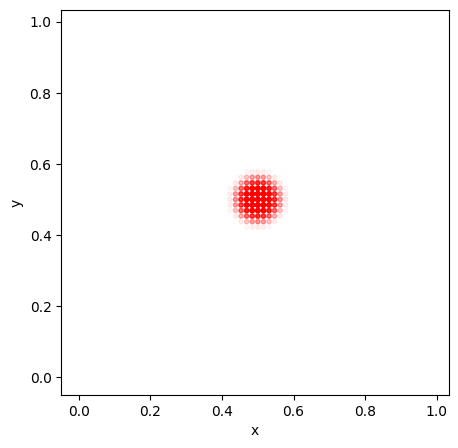

In [4]:
fig, ax = plt.subplots(figsize=(5,5))

alph = "u"
x1="x"
x2="y"

ax.scatter(sdf_ini[x1], sdf_ini[x2], marker=".", color="r", alpha=sdf_ini[alph]/np.max(sdf_ini[alph]))

ax.set_xlabel(x1)
ax.set_ylabel(x2)

plt.show()

In [5]:
print(f"U_tot = {dm*np.sum(sdf_ini['u'])}")

U_tot = 0.9999999999999976


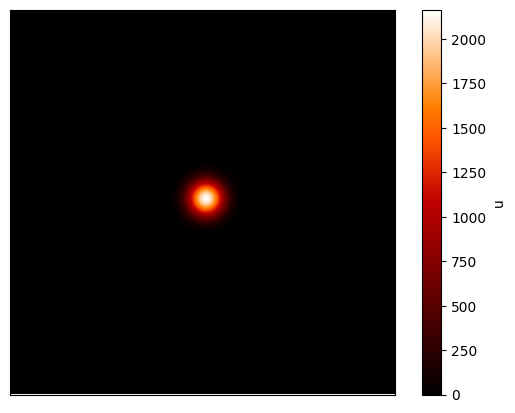

In [6]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf_ini.render('u', xsec=0.5, ax=ax, rotation=[0,0,0])

# Final Setup

In [7]:
sdf = src.read_csv('../Data/results/sedov_blast_wave/final.csv')
sdf.params={'mass':dm, 'hfact':eta}
sdf.calc_density()
sdf

,x,y,z,vx,vy,vz,h,u,rho
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.01875,0.0,1.000006
1,0.015625,0.000000,0.000000,-0.0,0.0,0.0,0.01875,0.0,1.000006
2,0.031250,0.000000,0.000000,-0.0,0.0,0.0,0.01875,0.0,1.000006
3,0.046875,0.000000,0.000000,-0.0,0.0,0.0,0.01875,0.0,1.000006
4,0.062500,0.000000,0.000000,-0.0,0.0,0.0,0.01875,0.0,1.000006
...,...,...,...,...,...,...,...,...,...
262139,0.921875,0.984375,0.984375,0.0,0.0,0.0,0.01875,0.0,1.000006
262140,0.937500,0.984375,0.984375,0.0,0.0,0.0,0.01875,0.0,1.000006
262141,0.953125,0.984375,0.984375,0.0,0.0,0.0,0.01875,0.0,1.000006
262142,0.968750,0.984375,0.984375,0.0,0.0,0.0,0.01875,0.0,1.000006


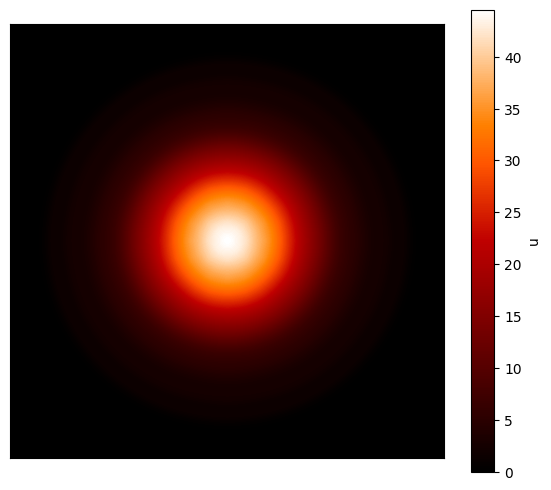

In [19]:
fig, ax = plt.subplots(figsize=(7,6))
ax = sdf.render('u', xsec=0.5, ax=ax, rotation=[0,0,0])

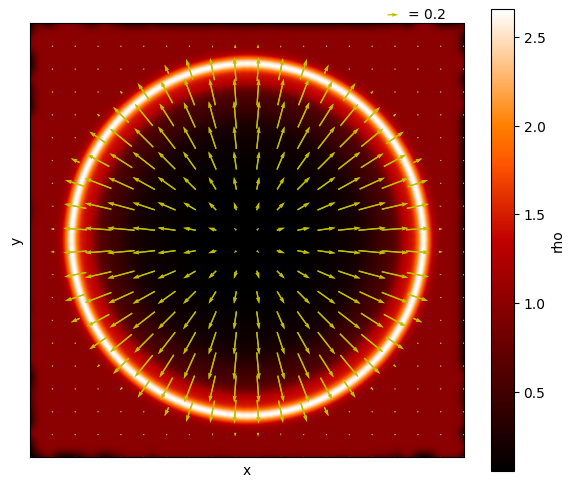

In [9]:
fig, ax = plt.subplots(figsize=(7,6))
ax = sdf.render('rho', xsec=0.5, ax=ax, rotation=[0,0,0])
ax = sdf.arrowplot(['vx', 'vy', 'vz'], color='y')

# Final Setup

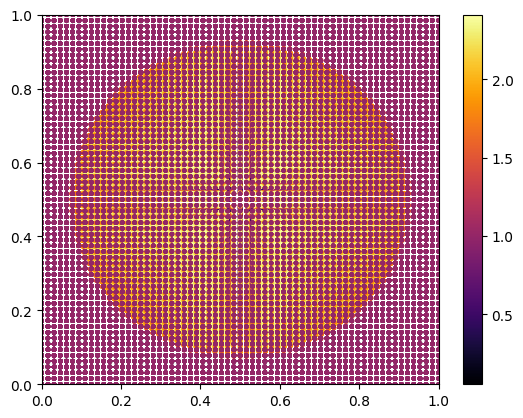

In [10]:
plt.scatter(sdf['x'], sdf['y'], c=sdf['rho'], cmap='inferno', s=5)
# Add a colorbar
plt.colorbar()
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

# Conservation's Laws

In [11]:
# Angular Momentum
def angular_momentum(x, y, z, vx, vy, vz):
    lx = y*vz - z*vy
    ly = z*vx - x*vz
    lz = x*vy - y*vx
    return lx, ly, lz

# Energy
def energy(vx, vy, vz, u):
    return 0.5*(vx*vx + vy*vy + vz*vz) + u

In [12]:
T = 3
time = range(T+1)
ang_mom = np.zeros(T+1)
lin_mom = np.zeros(T+1)
energ = np.zeros(T+1)

for ii in range(T+1):
    df = src.read_csv('../Data/results/sedov_blast_wave/' + str(ii) + ".csv")
    L = np.sum(angular_momentum(df['x'], df['y'], df['z'], df['vx'], df['vy'], df['vz']), axis=1)
    ang_mom[ii] = np.sqrt(L[0]*L[0] + L[1]*L[1] + L[2]*L[2])
    vx = np.sum(df['vx'])
    vy = np.sum(df['vy'])
    vz = np.sum(df['vz'])
    lin_mom[ii] = np.sqrt(vx*vx + vy*vy + vz*vz)
    energ[ii] = np.sum(energy(df['vx'], df['vy'], df['vz'], df['u']))

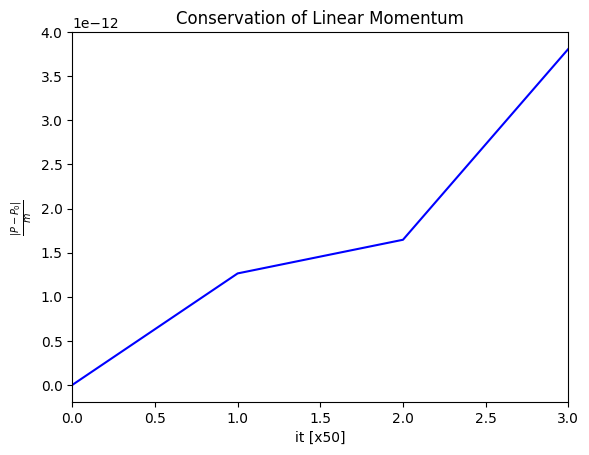

In [13]:
plt.plot(time[:], np.abs(lin_mom[:]-lin_mom[0]), '-', color='blue')
plt.title("Conservation of Linear Momentum")
plt.xlabel("it [x50]")
plt.ylabel(r"$\frac{|P-P_0|}{m}$")
plt.xlim(0, T)
plt.show()

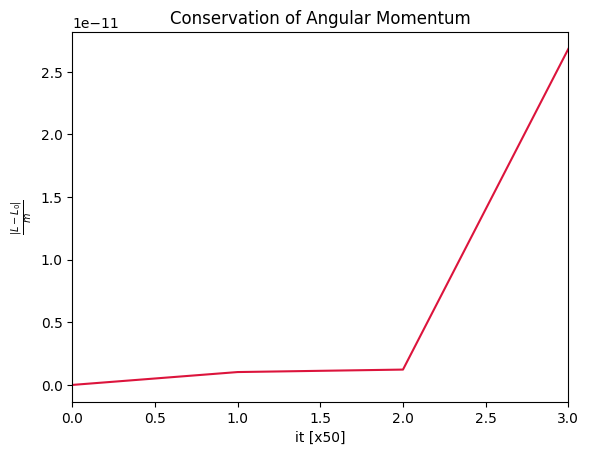

In [14]:
plt.plot(time[:], np.abs(ang_mom[:]-ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x50]")
plt.ylabel(r"$\frac{|L-L_0|}{m}$")
plt.xlim(0, T)
plt.show()

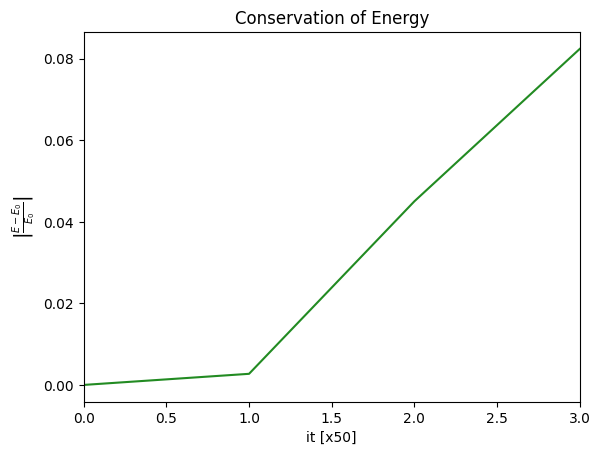

In [15]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='forestgreen')
plt.title("Conservation of Energy")
plt.xlabel("it [x50]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T)
plt.show()

# Density distribution

In [16]:
rad = np.sqrt((sdf["x"]-0.5)**2 + (sdf["y"]-0.5)**2+(sdf["z"]-0.5)**2)
t = 0.08082978661933742
wf = 1.1527*(t)**(0.4)

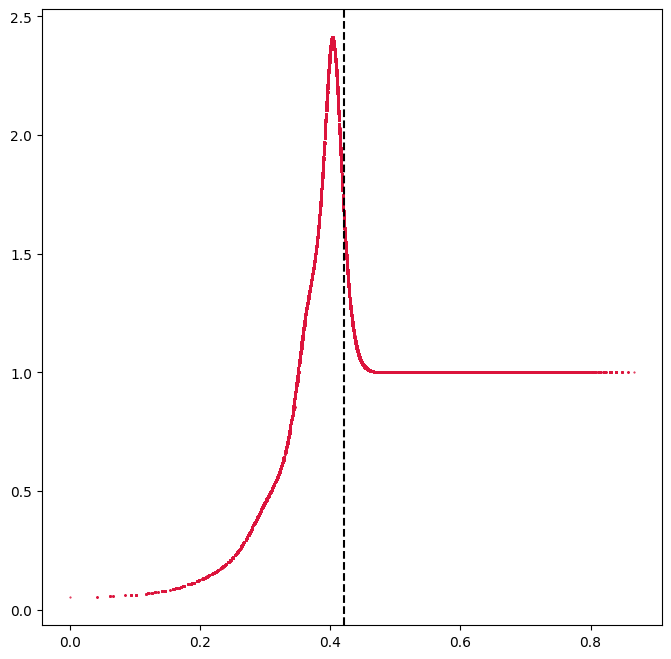

In [17]:
fig = plt.figure(figsize=(8,8))
plt.plot(rad, sdf['rho'], ".", color="crimson", markersize=1)
plt.axvline(x=wf, ls='--', c='k')
plt.show()

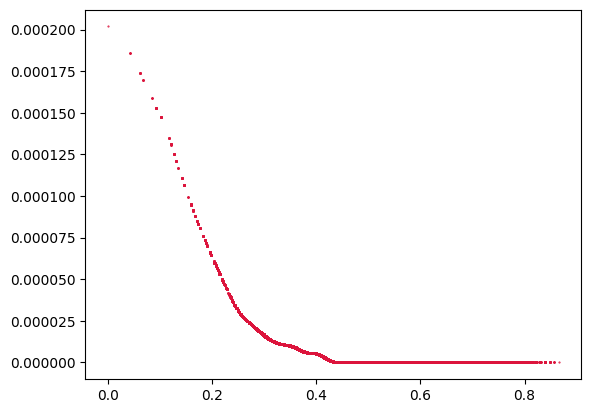

In [18]:
plt.plot(rad, dm*sdf['u'], ".", color="crimson", markersize=1)
plt.show()